c:\Users\Anshul Halkarni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


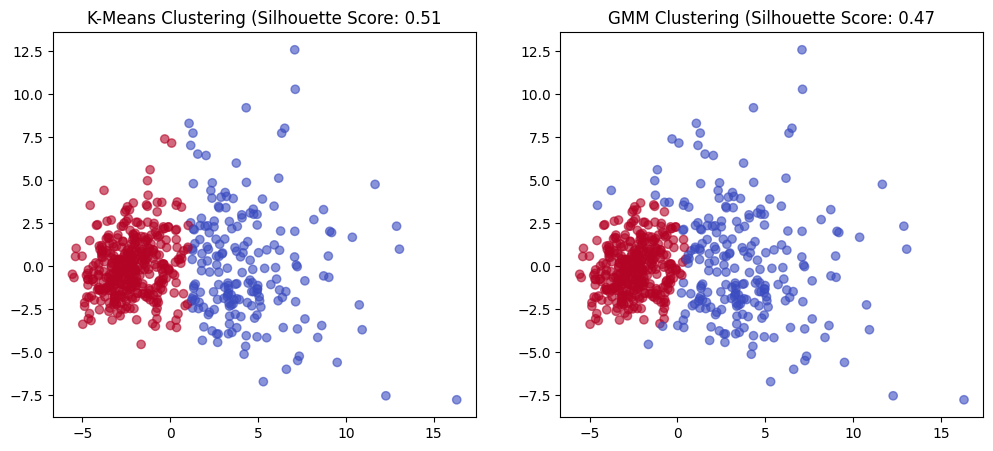

K-Means Silhouette Score: 0.51
Gaussian Mixture Model (GMM) Silhouette Score: 0.47


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
columns = ['ID', 'Diagnosis'] + [f'Feature_{i}' for i in range(1, 31)]
data = pd.read_csv(url, header=None, names=columns)
data.drop('ID', axis=1, inplace=True)
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})  # Malignant = 1, Benign = 0

X = data.iloc[:, 1:].values  # Extract features
y = data.iloc[:, 0].values   # Extract true labels

# Standardizing the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA to reduce dimensionality
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Implementing K-Means with optimized parameters
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

# Evaluate Clustering Performance
silhouette_kmeans = silhouette_score(X_pca, kmeans_labels)

# Implementing Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(X_pca)

# Evaluate GMM Performance
silhouette_gmm = silhouette_score(X_pca, gmm_labels)
# Plot Clustering Results
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='coolwarm', alpha=0.6)
ax[0].set_title(f'K-Means Clustering (Silhouette Score: {silhouette_kmeans:.2f}')

ax[1].scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap='coolwarm', alpha=0.6)
ax[1].set_title(f'GMM Clustering (Silhouette Score: {silhouette_gmm:.2f}')
plt.show()
print(f'K-Means Silhouette Score: {silhouette_kmeans:.2f}')
print(f'Gaussian Mixture Model (GMM) Silhouette Score: {silhouette_gmm:.2f}')





